In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##?
from keras.preprocessing.text import one_hot
import seaborn as sns 
from scipy import stats

from sklearn.model_selection import train_test_split

import re
import nltk 
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download("punkt")


from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud

###

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding,LSTM
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
data = pd.read_csv("IMDB Dataset.csv")

**Revisamos algunos datos de los datos:**

In [15]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [16]:
print("Columnas: ", data.columns, "\n")
print("Dimensiones: ", data.shape, "\n")

Columnas:  Index(['review', 'sentiment'], dtype='object') 

Dimensiones:  (50000, 2) 



In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


**Analizamos la primera reivsion y verificamos la existencia de valores nulos**

In [18]:
# Checking the first review
data.iloc[0][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# Reviews
**Positive words** : wonderful, extremely, well, stunning, good, talent, favorite, tears, thumbs up, excidement, like, laughter, love, liked, great.

---
**Negative words** : Slower, ruins, not funny,dropped off, painfully, worst,awful, cheap, nasty, boring.

# **Empezamos a limpiar los datos, vamos a reemplazar ocurrencias especiales en los reviews**

Como nuestro dataset se basa en elementos obtenidos de la web, es bastante común encontrarse con distintos elementos que deben ser purgados de las reviews:
   

>  URL's


> Tags a otras cuentas ej. @user123


> Elementos HTML


> Caracteres especiales No deseados

> Mayusculas (transformar a minusculas)


> Stop Words





In [19]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [20]:
def cleaning():
  #Cleaning URL's
  data["review"]=data["review"].map(remove_emoji)
  data["review"]=data["review"].str.replace(r"http\S+","URL")
  data["review"]=data["review"].str.replace(r"Http\S+","URL")
  data["review"]=data["review"].str.replace(r"HTTP\S+","URL")
  #Cleaning tags
  data["review"]=data["review"].str.replace(r"@\S+","")
  #Cleaning HTML
  data["review"]=data["review"].str.replace(r"<br /><br />","")
  data["review"]=data["review"].str.replace(r"/><br />","")
  #Cleaning special Characters
  data["review"]=data["review"].str.replace(r"[^a-zA-Z]"," ")
  data["review"]=data["review"].str.replace(r"\\W"," ")
  #Converting all word to lower
  data["review"]=data["review"].str.lower()

In [21]:
cleaning()

In [22]:
# Giving a code to sentiment column
data["sentiment"] = data["sentiment"].replace("positive",1)
data["sentiment"] = data["sentiment"].replace("negative",0)

In [23]:
# Creating the instance for lemmatizer
lemmatizer = WordNetLemmatizer()
##?
corpus = []

In [24]:
def PreProcessing(review):
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    return review

In [ ]:
# Processing data
data['review_clean_array'] = data['review'].apply(lambda x: PreProcessing(x))

In [ ]:
data.head()

In [ ]:
data['review_clean'] = data['review_clean_array'].apply(lambda x: ' '.join(x))

In [ ]:
data.to_csv("clean_data.csv",index=False)

In [63]:
dataProcessed = pd.read_csv("clean_data.csv")

FileNotFoundError: ignored

In [52]:
dataProcessed.iloc[0][0]

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [53]:
dataProcessed.iloc[0][2]

['one',
 'reviewer',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 'show',
 'dare',
 'forget',
 'pretty',
 'p

In [54]:
dataProcessed.head()

,review,sentiment,review_clean
0,one of the other reviewers has mentioned that ...,1,"[one, reviewer, mentioned, watching, oz, episo..."
1,a wonderful little production the filming tec...,1,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there s a family where a little boy ...,0,"[basically, family, little, boy, jake, think, ..."
4,petter mattei s love in the time of money is...,1,"[petter, mattei, love, time, money, visually, ..."


In [31]:
phrases = dataProcessed['review_clean'].tolist()

In [37]:
len(phrases)

50000

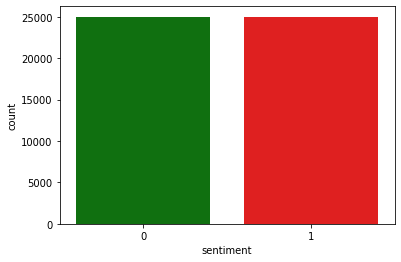

1    25000
0    25000
Name: sentiment, dtype: int64


In [55]:
sns.countplot(dataProcessed["sentiment"], palette = ["green","red"])
plt.show()
print(dataProcessed.sentiment.value_counts())

In [60]:
pos=' '.join(map(str,(dataProcessed[dataProcessed['sentiment']==1])["review_clean"]))
neg=' '.join(map(str,(dataProcessed[dataProcessed['sentiment']==0])["review_clean"]))


In [61]:
wordcloudPositive = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(pos) 

(-0.5, 799.5, 799.5, -0.5)

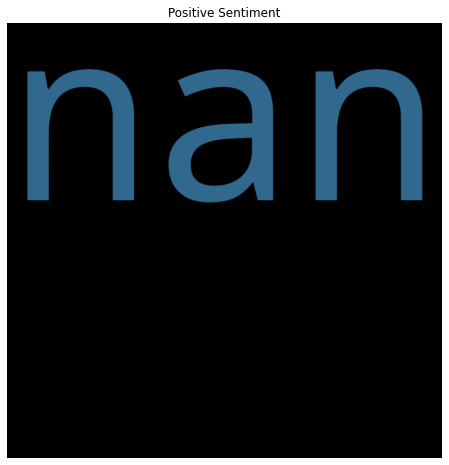

In [62]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloudPositive)
plt.title('Positive Sentiment')
plt.axis('off')

In [ ]:
dataProcessed.to_csv('clean_data.csv',index=False)

In [ ]:
dataProcessed.shape

(50000, 3)

**Verifying one more time if there still garbage**

In [ ]:
print("Verify for Html elements: ",data['review_clean'].str.contains("<br />").sum())
print("Verify for (>): ",data['review_clean'].str.contains(">").sum())
print("Verify for (<): ",data['review_clean'].str.contains("<").sum())
print("Verify for (@): ",data['review_clean'].str.contains("@").sum())
print("Verify for (http): ",data['review_clean'].str.contains("http").sum())

Verify for Html elements:  0
Verify for (>):  0
Verify for (<):  0
Verify for (@):  0
Verify for (http):  0


In [ ]:
#Ineffective english words list
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('english')

In [ ]:
#Train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,sentiment,test_size = 0.2, random_state = 42)

NameError: ignored

In [ ]:
#Dictionary of 15000 most used words in English
from tensorflow.python.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 15000)
tokenizer.fit_on_texts(data)
tokenizer.word_index